# Mini-projet &ndash; Prédire la langue d'origine d'un mot &ndash; Fiche professeur

## Sommaire<a id="sommaire"></a>
[**Objectif**](#objectif)    
[**1. Travail sur les données**](#travail-sur-donnees)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Lecture et écriture de fichiers CSV](#lecture-ecriture-csv)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Fonction ``nb_voyelles``](#fonction-nb_voyelles)    
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Travail sur les données](#travail-sur-les-donnees)    
[**2. Représentation à l'aide de ``matplotlib``**](#matplotlib)  
[**3. Classification à l'aide de l'algorithme des $k$ plus proches voisins**](#classification-knn)   
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Fonction ``distance``](#fonction-distance)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Trouver les $k$ plus proches voisins d'un nouveau mot](#trouver-kppv)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Fonction ``occurrences_origines``](#fonction-occurrences_origines)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.4 Déterminer l'origine majoritaire](#determiner-origine-majoritaire)    
&nbsp;&nbsp;&nbsp;&nbsp;[3.5 Classification d'un nouveau mot](#classification-nouveau-mot)

## Objectif<a id="objectif"></a>

[Retour au sommaire](#sommaire)

L'objectif de ce projet est de prédire la langue d'origine d'un mot en utilisant l'algorithme des $k$ plus proches voisins. On se limitera à des mots français et allemands.

## 1. Travail sur les données<a id="travail-sur-donnees"></a>

[Retour au sommaire](#sommaire)

Le fichier ``echantillon_mots.csv`` contient une liste de mots avec leur origine.

### 1.1 Lecture et écriture de fichiers CSV<a id="lecture-ecriture-csv"></a>

[Retour au sommaire](#sommaire)

<font style="color:rgb(113,65,224)">**Exercice**    
1. Écrire une fonction ``ouvrir_csv`` qui prend en paramètre une chaîne de caractères (le nom d'un fichier) et qui renvoie les données de ce fichier sous forme d'une liste de dictionnaires.</font>

In [1]:
# À vous de jouer !
import csv


def ouvrir_csv(fichier):
    with open (fichier, "r") as f:
        table = list(csv.DictReader(f))
    return table

<font style="color:rgb(113,65,224)">2. Lire alors le contenu du fichier ``echantillon_mots.csv``.</font>

In [2]:
# À vous de jouer !
ouvrir_csv("echantillon_mots.csv")

[{'mot': 'dich', 'origine': 'allemand'},
 {'mot': 'eher', 'origine': 'allemand'},
 {'mot': 'statt', 'origine': 'allemand'},
 {'mot': 'guten', 'origine': 'allemand'},
 {'mot': 'stellt', 'origine': 'allemand'},
 {'mot': 'musste', 'origine': 'allemand'},
 {'mot': 'kleine', 'origine': 'allemand'},
 {'mot': 'zweiten', 'origine': 'allemand'},
 {'mot': 'nordisch', 'origine': 'allemand'},
 {'mot': 'erhalten', 'origine': 'allemand'},
 {'mot': 'ebenfalls', 'origine': 'allemand'},
 {'mot': 'geschichte', 'origine': 'allemand'},
 {'mot': 'verschiedenen', 'origine': 'allemand'},
 {'mot': 'moyen', 'origine': 'français'},
 {'mot': 'prendre', 'origine': 'français'},
 {'mot': 'pouvoir', 'origine': 'français'},
 {'mot': 'nouvelle', 'origine': 'français'},
 {'mot': 'pourquoi', 'origine': 'français'},
 {'mot': 'autrement', 'origine': 'français'},
 {'mot': 'politique', 'origine': 'français'},
 {'mot': 'conditions', 'origine': 'français'},
 {'mot': 'entreprises', 'origine': 'français'},
 {'mot': 'information

<font style="color:rgb(113,65,224)">3. Écrire une fonction ``ecrire_csv`` qui prend en paramètres :
  - une chaîne de caractères ``fichier_sortie`` (le nom du fichier CSV de sortie) ;
  - une liste d'attributs ``attributs`` (pour la première ligne du fichier CSV de sortie);
  - une liste de dictionnaires ``donnees``,
    
et qui écrit dans le fichier CSV les données présentes dans la liste ``donnees``.</font>

In [3]:
# À vous de jouer !
def ecrire_csv(fichier_sortie, attributs, donnees):
    with open(fichier_sortie, "w") as sortie:
        w = csv.DictWriter(sortie, attributs)
        w.writeheader()
        w.writerows(donnees)

### 1.2 Fonction ``nb_voyelles``<a id="fonction-nb_voyelles"></a>

[Retour au sommaire](#sommaire)

<font style="color:rgb(113,65,224)">**Exercice**    
On souhaite écrire une fonction ``nb_voyelles`` qui prend en paramètre un mot (chaîne de caractères) et qui renvoie le nombre de voyelles de ce mot.

1. Écrire trois tests pour la fonction ``nb_voyelles``.
2. Écrire la fonction ``nb_voyelles`` puis vérifier qu'elle passe les tests écrits.</font>

In [4]:
# À vous de jouer !
def nb_voyelles(mot):
    n = 0
    for lettre in mot:
        if lettre in "aeiouy":
            n += 1
    return n

In [5]:
# Tests de la fonction nb_voyelles à écrire ici
assert nb_voyelles("marin") == 2
assert nb_voyelles("louveteau") == 6
assert nb_voyelles("parachute") == 4

### 1.3 Travail sur les données<a id="travail-sur-les-donnees"></a>

[Retour au sommaire](#sommaire)

<font style="color:rgb(113,65,224)">**Exercice**    
1. Créer un fichier ``echantillon_mots_complete.csv`` obtenu à partir du fichier ``echantillon_mots.csv`` en ajoutant le nombre de voyelles ``nb_voyelles`` et la longueur ``longueur``.</font>

In [6]:
# À vous de jouer !
echantillon = ouvrir_csv("echantillon_mots.csv")
echantillon_complete = [
    {'mot': mot['mot'],
     'origine': mot['origine'],
     'nb_voyelles': nb_voyelles(mot['mot']),
     'longueur': len(mot['mot'])
    }
    for mot in echantillon
]
ecrire_csv("echantillon_mots_complete.csv", 
           ["mot", "origine", "nb_voyelles", "longueur"], 
           echantillon_complete
          )

<font style="color:rgb(113,65,224)">2. Vérifier que le résultat semble correct, en utilisant par exemple la fonction ``ouvrir_csv``.</font>

In [7]:
# À vous de jouer !
ouvrir_csv("echantillon_mots_complete.csv")

[{'mot': 'dich', 'origine': 'allemand', 'nb_voyelles': '1', 'longueur': '4'},
 {'mot': 'eher', 'origine': 'allemand', 'nb_voyelles': '2', 'longueur': '4'},
 {'mot': 'statt', 'origine': 'allemand', 'nb_voyelles': '1', 'longueur': '5'},
 {'mot': 'guten', 'origine': 'allemand', 'nb_voyelles': '2', 'longueur': '5'},
 {'mot': 'stellt', 'origine': 'allemand', 'nb_voyelles': '1', 'longueur': '6'},
 {'mot': 'musste', 'origine': 'allemand', 'nb_voyelles': '2', 'longueur': '6'},
 {'mot': 'kleine', 'origine': 'allemand', 'nb_voyelles': '3', 'longueur': '6'},
 {'mot': 'zweiten',
  'origine': 'allemand',
  'nb_voyelles': '3',
  'longueur': '7'},
 {'mot': 'nordisch',
  'origine': 'allemand',
  'nb_voyelles': '2',
  'longueur': '8'},
 {'mot': 'erhalten',
  'origine': 'allemand',
  'nb_voyelles': '3',
  'longueur': '8'},
 {'mot': 'ebenfalls',
  'origine': 'allemand',
  'nb_voyelles': '3',
  'longueur': '9'},
 {'mot': 'geschichte',
  'origine': 'allemand',
  'nb_voyelles': '3',
  'longueur': '10'},
 {'

## 2. Représentation à l'aide de ``matplotlib``<a id="matplotlib"></a>

[Retour au sommaire](#sommaire)

<font style="color:rgb(113,65,224)">**Exercice**    
À l'aide de la bibliothèque ``matplotlib``, représenter les données du fichier ``echantillon_mots_complete.csv``. On représentera le nombre de voyelles en fonction de la longueur du mot.</font>

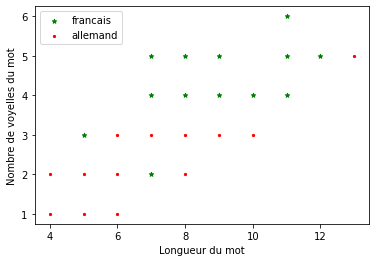

In [8]:
# À vous de jouer
import matplotlib.pyplot as plt
echantillon = ouvrir_csv("echantillon_mots_complete.csv")
X_mots_fr = [int(mot['longueur']) for mot in echantillon
             if mot['origine'] == 'français'
           ]
Y_mots_fr = [int(mot['nb_voyelles']) for mot in echantillon
             if mot['origine'] == 'français'
           ]
X_mots_de = [int(mot['longueur']) for mot in echantillon
             if mot['origine'] == 'allemand'
           ]
Y_mots_de = [int(mot['nb_voyelles']) for mot in echantillon
             if mot['origine'] == 'allemand'
           ]
plt.scatter(X_mots_fr, Y_mots_fr, color='g', label='francais', 
            s = 20, marker = '*')
plt.scatter(X_mots_de, Y_mots_de, color='r', label='allemand',
            s = 20, marker = '.')
plt.legend()
# étiquettes des axes
plt.xlabel('Longueur du mot')
plt.ylabel('Nombre de voyelles du mot')
# affichage du graphique
plt.show()

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice**    
Faire apparaître les mots anoure, ohrwurm et vitrine sur le graphique précédent.</font>

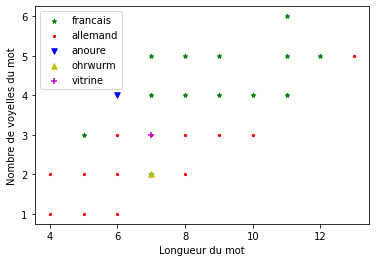

In [9]:
# À vous de jouer
import matplotlib.pyplot as plt
echantillon = ouvrir_csv("echantillon_mots_complete.csv")
X_mots_fr = [int(mot['longueur']) for mot in echantillon
             if mot['origine'] == 'français'
           ]
Y_mots_fr = [int(mot['nb_voyelles']) for mot in echantillon
             if mot['origine'] == 'français'
           ]
X_mots_de = [int(mot['longueur']) for mot in echantillon
             if mot['origine'] == 'allemand'
           ]
Y_mots_de = [int(mot['nb_voyelles']) for mot in echantillon
             if mot['origine'] == 'allemand'
           ]
plt.scatter(X_mots_fr, Y_mots_fr, color='g', label='francais', 
            s = 20, marker = '*')
plt.scatter(X_mots_de, Y_mots_de, color='r', label='allemand',
            s = 20, marker = '.')
plt.scatter(6, 4, color='b', label='anoure', s=30, marker='v')
plt.scatter(7, 2, color='y', label='ohrwurm', s=30, marker='^')
plt.scatter(7, 3, color='m', label='vitrine', s=30, marker='+')
plt.legend()
# étiquettes des axes
plt.xlabel('Longueur du mot')
plt.ylabel('Nombre de voyelles du mot')
# affichage du graphique
plt.show()

## 3. Classification à l'aide de l'algorithme des $k$ plus proches voisins<a id="classification-knn"></a>

 [Retour au sommaire](#sommaire) 

### 3.1 Fonction ``distance``<a id="fonction-distance"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice**   
Écrire une fonction ``distance`` qui prend en paramètres :
- ``longueur_A`` et ``nb_voyelles_A`` : la longueur et le nombre de voyelles d'un premier mot ;
- ``longueur_B`` et ``nb_voyelles_B`` : la longueur et le nombre de voyelles d'un second mot,

et qui renvoie la distance entre les deux mots donnée par :


$\sqrt{(\text{longueur_A}-\text{longueur_B})^2+(\text{nb_voyelles_A}-\text{nb_voyelles_B})^2}$</font>

In [10]:
# À vous de jouer !
from math import sqrt


def distance(longueur_A, nb_voyelles_A, longueur_B, nb_voyelles_B):
    return sqrt((longueur_A - longueur_B) ** 2 +
                (nb_voyelles_A - nb_voyelles_B) ** 2
    )

### 3.2 Trouver les $k$ plus proches voisins d'un nouveau mot<a id="trouver-kppv"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice**    
Écrire une fonction ``kppv`` qui prend en paramètres :
- une liste ``echantillon`` de mots (de dictionnaires ayant quatre clés : le mot, la longueur, le nombre de voyelles du mot et l'origine du mot) ;
- un entier naturel non nul ``k`` ;
- la longueur ``longueur`` et le nombre de voyelles ``nb_voyelles`` d'un nouveau mot,

et qui renvoie les $k$ plus proches voisins de ce nouveau mot.</font>

In [11]:
# À vous de jouer !
def kppv(echantillon, k, longueur, largeur):
    # on rajoute à chaque mot (dictionnaire) de la liste echantillon
    # la distance (nouvelle clé) avec le nouveau mot à classer
    echantillon_avec_distance = [
        {'mot': mot['mot'],
         'origine': mot['origine'],
         'longueur': mot['longueur'],
         'nb_voyelles': mot['nb_voyelles'],
         'distance': distance(int(mot['longueur']), int(mot['nb_voyelles']),
                              longueur, largeur
                             )
        }
        for mot in echantillon
    ]
    # on trie cette liste d'iris par distances croissantes
    echantillon_avec_distance.sort(key=lambda mot: mot['distance'])
    return echantillon_avec_distance[:k]

In [12]:
# Un test pour vérifier votre travail
echantillon = ouvrir_csv('echantillon_mots_complete.csv')

### 3.3 Fonction ``occurrences_origines``<a id="fonction-occurrences_origines"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice**    
On souhaite écrire une fonction ``occurrences_origines`` qui prend en paramètre une liste de mots ``echantillon`` et qui renvoie un dictionnaire dont les clés sont ``'français'`` et ``'allemand'`` et les valeurs le nombre de mots de chaque origine.
1. Sachant que le jeu de données contient $13$ mots français et $13$ mots allemands, compléter le test de la fonction ``occurrences_origines``.
2. Écrire alors la fonction ``occurrences_origines``, puis utiliser le test écrit précédemment.</font>

In [13]:
# À vous de jouer !
def occurrences_origines(echantillon):
    occurrences = {'français': 0, 'allemand': 0}
    for mot in echantillon:
        origine = mot['origine']
        occurrences[origine] += 1
    return occurrences

In [14]:
# Un test à compléter
echantillon = ouvrir_csv('echantillon_mots_complete.csv')
assert occurrences_origines(echantillon) == {'français': 13, 
                                             'allemand': 13}

### 3.4 Déterminer l'origine majoritaire<a id="determiner-origine-majoritaire"></a>

[Retour au sommaire](#sommaire)

<font style="color:rgb(113,65,224)">**Exercice**    
On souhaite écrire une fonction ``origine_majoritaire`` qui prend en paramètre une liste de mots ``echantillon`` et qui renvoie l'origine majoritaire dans cette liste.
1. Compléter le test de la fonction ``origine_majoritaire``.
2. Écrire la fonction ``origine_majoritaire``, puis utiliser le test écrit précédemment.</font>

In [15]:
# À vous de jouer !
def origine_majoritaire(echantillon):
    # on récupère le dictionnaire donnant les occurrences de chaque origine
    occurrences = occurrences_origines(echantillon)
    # on déterminer l'espèce majoritaire
    if occurrences['français'] > occurrences['allemand']:
        origine = 'français'
    else:
        origine = 'allemand'
    return origine

In [16]:
# Un test à compléter
echantillon = [{'mot': 'dich', 'origine': 'allemand'}, 
               {'mot': 'eher', 'origine': 'allemand'}, 
               {'mot': 'statt', 'origine': 'allemand'}, 
               {'mot': 'guten', 'origine': 'allemand'}, 
               {'mot': 'moyen', 'origine': 'français'}, 
               {'mot': 'prendre', 'origine': 'français'}, 
               {'mot': 'pouvoir', 'origine': 'français'}
              ]
assert origine_majoritaire(echantillon) == 'allemand'

### 3.5 Classification d'un nouveau mot<a id="classification-nouveau-mot"></a>

 [Retour au sommaire](#sommaire) 

<font style="color:rgb(113,65,224)">**Exercice**    
Écrire une fonction ``classification`` qui prend en paramètres :
- une liste de mots ``echantillon`` (de dictionnaires ayant quatre clés : le mot, la longueur, le nombre de voyelles et l'origine) ;
- un entier naturel non nul ``k`` ;
- la longueur ``longueur`` et le nombre de voyelles ``nb_voyelles`` d'un nouveau mot,

et qui renvoie l'origine majoritaire parmi les $k$ plus proches voisins du nouveau mot.</font>

In [17]:
# À vous de jouer !
def classification(echantillon, k, longueur, nb_voyelles):
    # on détermine les k plus proches voisins
    voisins = kppv(echantillon, k, longueur, nb_voyelles)
    origine = origine_majoritaire(voisins)
    return origine

<font style="color:rgb(113,65,224)">**Exercice**    
1. Classer alors les mots anoure, ohrwurm et vitrine en utilisant $k=7$.</font>

In [18]:
# On classe le mot anoure
echantillon = ouvrir_csv("echantillon_mots_complete.csv")
mot = "anoure"
classification(echantillon, 7, len(mot), nb_voyelles(mot))

'français'

In [19]:
# On classe le mot ohrwurm
echantillon = ouvrir_csv("echantillon_mots_complete.csv")
mot = "ohrwurm"
classification(echantillon, 7, len(mot), nb_voyelles(mot))

'allemand'

In [20]:
# On classe le mot vitrine
echantillon = ouvrir_csv("echantillon_mots_complete.csv")
mot = "vitrine"
classification(echantillon, 7, len(mot), nb_voyelles(mot))

'allemand'

<font style="color:rgb(113,65,224)">2. Quelle remarque peut-on faire ?</font>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Ce(tte) œuvre est mise à disposition selon les termes de la <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licence Creative Commons Attribution - Pas d’Utilisation Commerciale - Partage dans les Mêmes Conditions 4.0 International</a>.